## Ejercicio N°1
Calcular las potencias activa (P), reactiva (Q) y aparente (S) del siguiente circuito y dibujar el fasorial de potencias.

<img src="img/tp4ep1.png">

### Solución

In [1]:
import math, cmath

In [2]:
# Datos:
Z1 = 10 + 10j # Ohm
Z2 = 0 + 10j # Ohm
Z3 = 100 + 0j # Ohm
U = 220 # V

In [3]:
# Defino una función que calcula elementos en paralelo
def prl(x,y):
    return (x*y)/(x + y)

In [4]:
# (Z2 + Z3) || Z1
Zeq = prl(Z2 + Z3, Z1)
I_tot = U/Zeq
I1 = U/Z1
I2 = I_tot - I1
U2 = I2*Z2
U3 = I2*Z3

In [5]:
# Potencia aparente (S):
S = U*I_tot
phi = cmath.phase(S)
# Potencia activa (P):
P = abs(U) * abs(I_tot) * math.cos( phi )
# Potencia reactiva (Q):
Q = abs(U) * abs(I_tot) * math.sin( phi )

In [25]:
print('Resultados:')
print('S = (%.2f < %.2f°) [VA]'%(abs(S) , math.degrees( phi ) ))
print('P = %.2f [W]'%P)
print('Q = %.2f [VAr]'%abs(Q) ) 

Resultados:
S = (3807.37 < -40.41°) [VA]
P = 2899.21 [W]
Q = 2467.92 [VAr]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


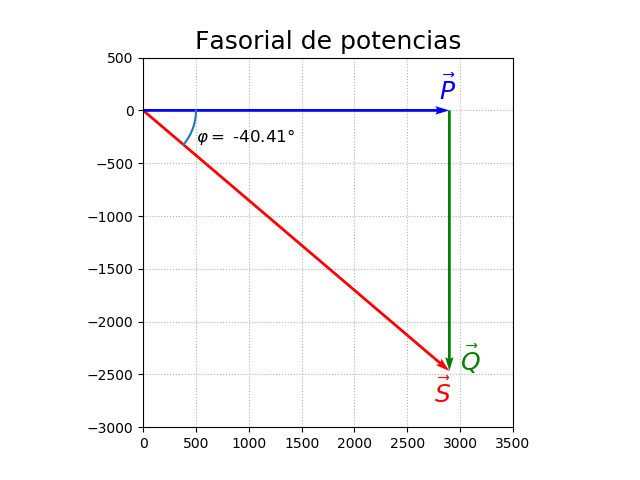

In [33]:
%matplotlib notebook
plt.figure()
ax = plt.gca()
ax.quiver(0,0,P,Q,angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(0,0,P,0,angles='xy',scale_units='xy',scale=1,color='blue')
ax.quiver(P,0,0,Q,angles='xy',scale_units='xy',scale=1,color='green')   
plt.text(P - 150, Q - 300, r'$\vec S$', fontsize=18, color='red', fontweight='bold')
plt.text(P - 100,  100, r'$\vec P$', fontsize=18, color='blue', fontweight='bold')
plt.text(P + 100, Q, r'$\vec Q$', fontsize=18, color='green', fontweight='bold')
plt.text(500, - 300, r'$\varphi =$ %.2f°'%( math.degrees(phi) ), fontsize=12)
theta = np.linspace(0, phi, 100) 
x1 = 500 * np.cos(theta)
x2 = 500 * np.sin(theta)
plt.plot(x1, x2)
ax.set_xlim([0,3500])
ax.set_ylim([-3000,500])
ax.set_aspect('equal')
plt.title('Fasorial de potencias', fontsize=18)
plt.grid(linestyle=":")
ax.set_axisbelow(True)
plt.draw()
plt.show()

In [62]:
%reset -s -f

## Ejercicio N°2
Calcular el valor de la capacidad para que $\cos \varphi = 0,9$

<img src="img/tp4ep2.png">

### Solución